In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [1]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**My model**

In [326]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=1.2)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=1.5)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.015)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.005)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1000)
    z_plus = gillespy2.Species(name='z_plus', initial_value=100)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=8.0, num_points=81)
    model.timespan(tspan)
    return model

In [327]:
switching_model = switching_process()

In [328]:
%time switching_results = switching_model.run(number_of_trajectories=15)

CPU times: user 7.26 ms, sys: 14.7 ms, total: 21.9 ms
Wall time: 1min 5s


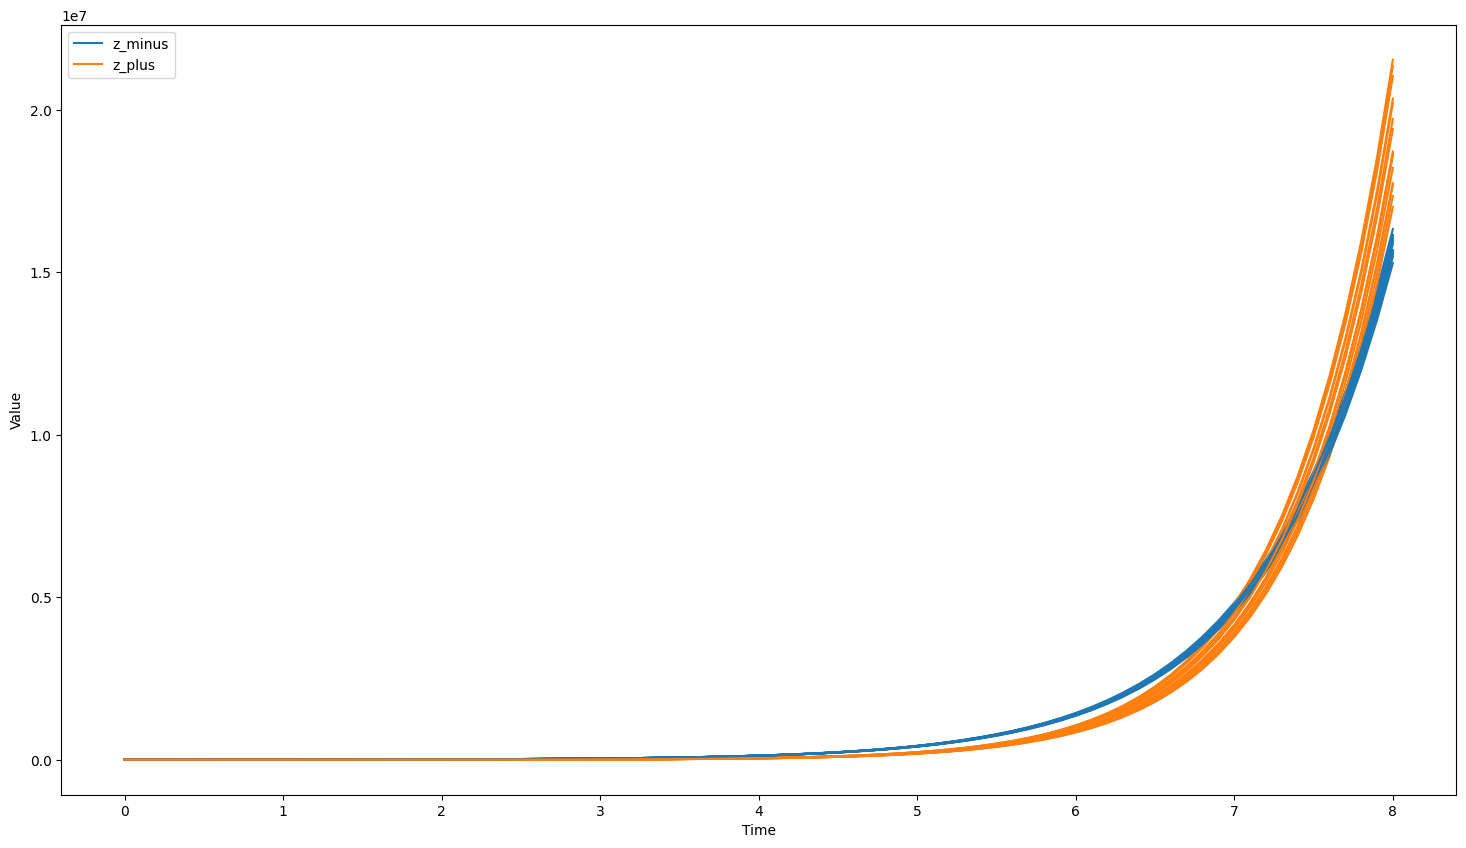

In [329]:
switching_results.plot()

In [331]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()

In [309]:
results_avg['z_minus'][-1], results_stddev['z_minus'][-1]

(15758000.666666666, 400242.8320869997)

In [310]:
print(results_stddev['z_minus'][-1] / results_avg['z_minus'][-1])
print(results_stddev['z_plus'][-1] / results_avg['z_plus'][-1])

0.025399340979445725
0.11506610613264306


In [110]:
np.exp(.5 * 4),np.sqrt(np.exp(.5 * 4) * (np.exp(.5 * 4) - 1))

(7.38905609893065, 6.8708874197015914)

In [70]:
type(np.array(results_avg['z_minus']))

numpy.ndarray

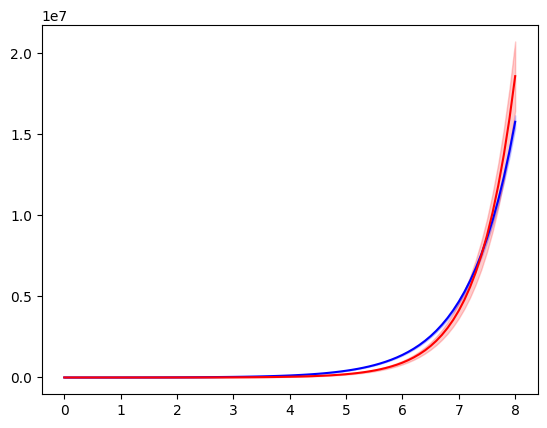

In [311]:
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)

In [ ]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

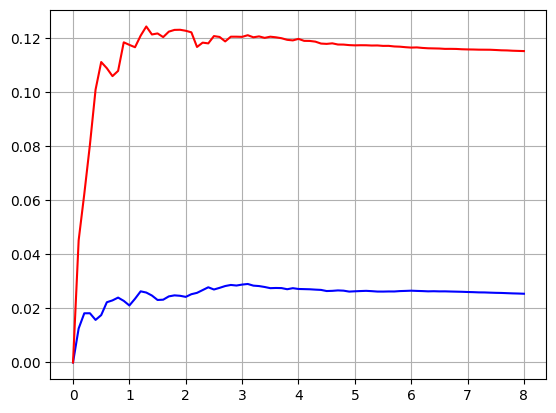

In [312]:
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red')
plt.grid()

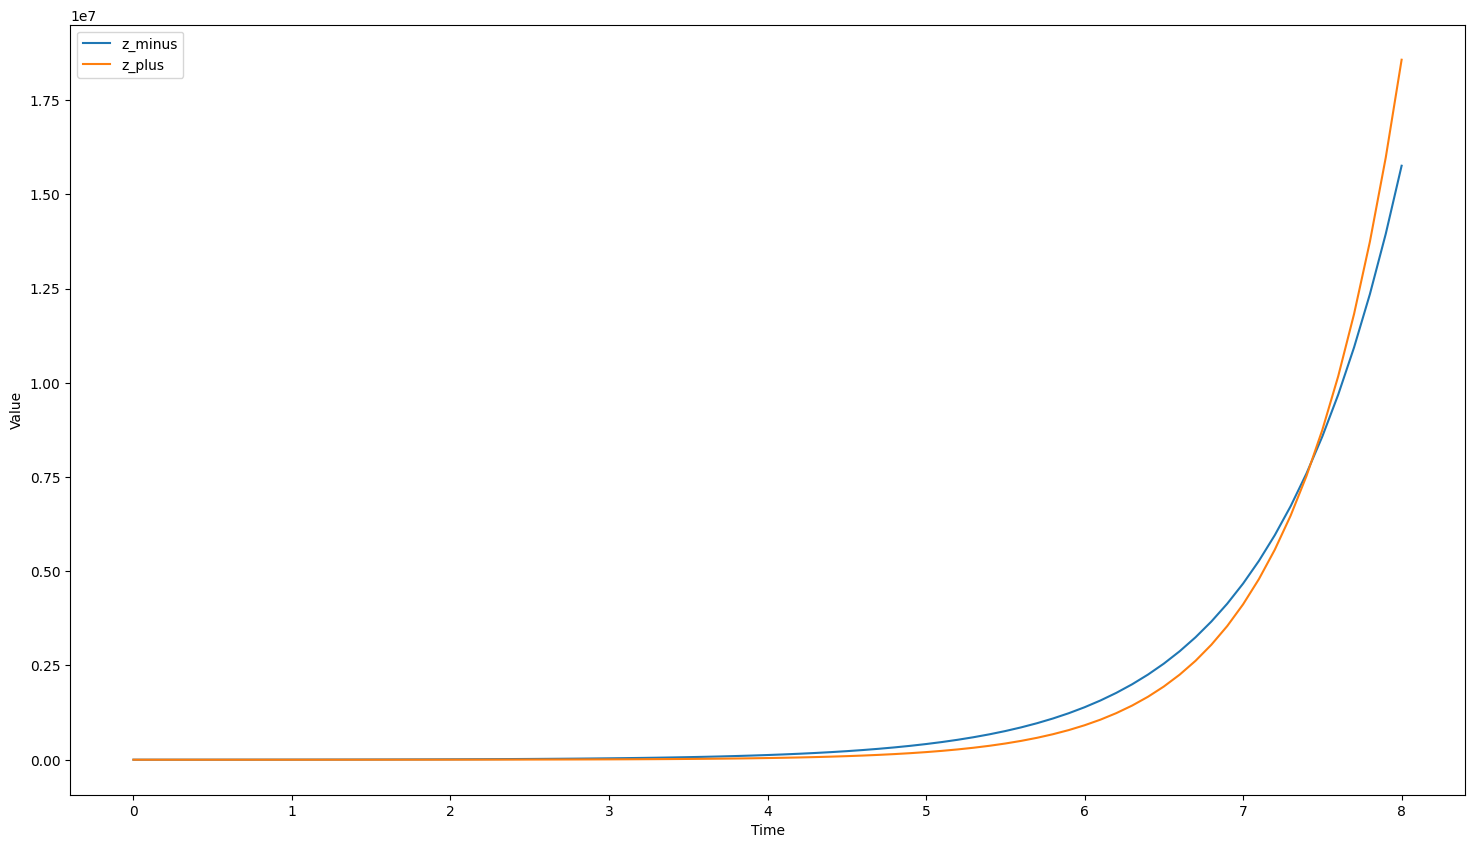

In [313]:
results_avg.plot()

In [ ]:
switching_results[0]

In [ ]:
results_avg.to_array()

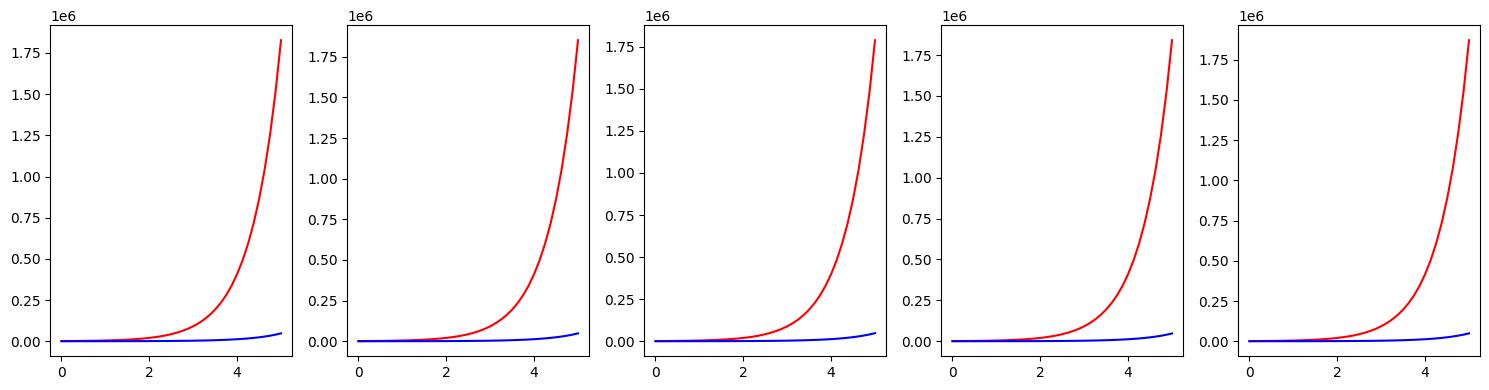

In [170]:
fig,axs = plt.subplots(1,5, figsize=(15,4))
for i in range(0,5):
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_minus'], 'r')
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_plus'], 'b')
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

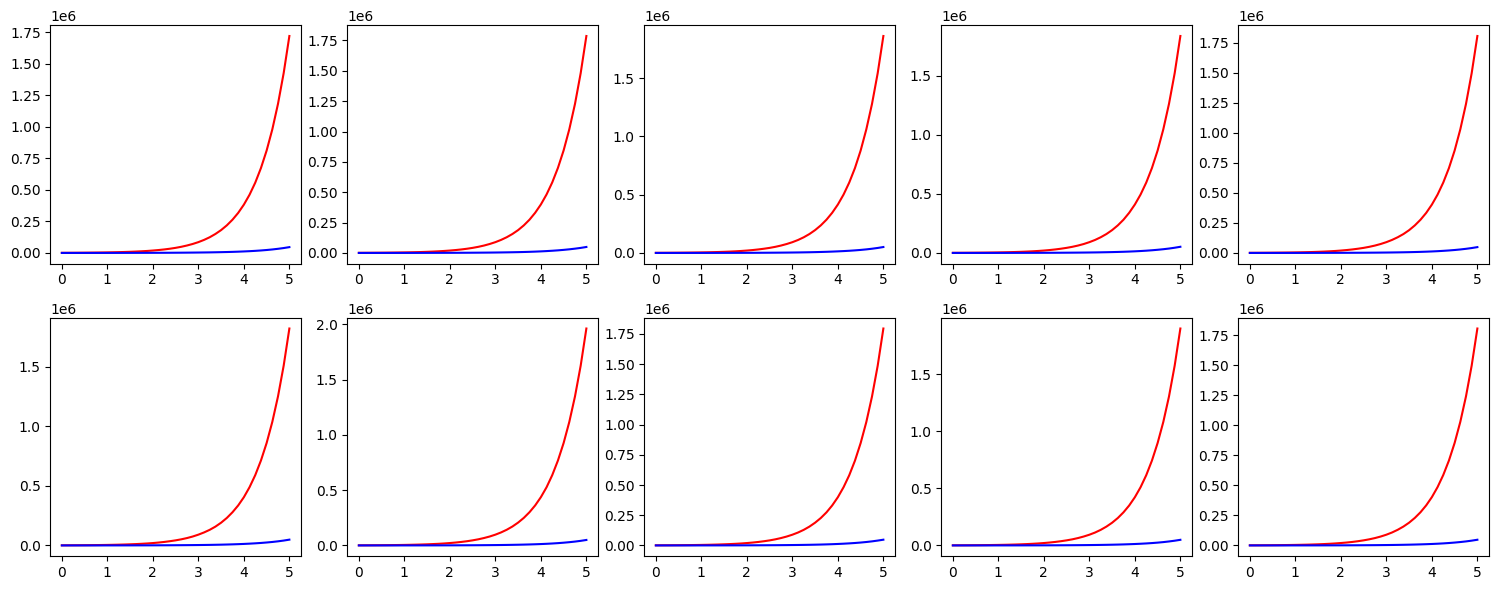

In [245]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        #axs[j,i].set_ylim(0,2e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [332]:
for i in range(0,15):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    df.to_csv('./Gillespy2/1.2_1.5_0.005_0.015_8t_81p/switching_results_{}.csv'.format(i))

In [333]:
df_avg = pd.DataFrame(results_avg.to_array()[0], columns=['time', 'z_minus', 'z_plus'])

In [334]:
df_avg.to_csv('./Gillespy2/1.2_1.5_0.005_0.015_8t_81p/switching_results_avg.csv')